In [68]:
#import packages for data generation and optimization
import numpy as np
import math
import matplotlib.pyplot as splt
from scipy import signal
from scipy.optimize import curve_fit

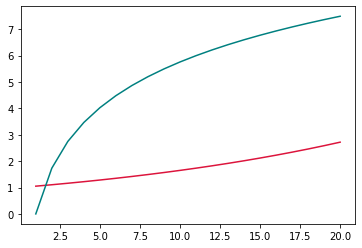

In [70]:
#Generate data for this example
#Load experimental data into variables

t = list(range(1,20+1))
Y = list(map(lambda x: 2.5*(math.log(x)), t))
U = list(map(lambda x: math.exp(0.05*x), t))

plt.plot(t,U, color = 'crimson')
plt.plot(t,Y, color = 'teal')

In [78]:
#Define LTI state-space model using matrices and parameters
#For more information on expressing a system of equations into a state-space form to feed into the model, this is a good starting point:
#http://web.mit.edu/2.14/www/Handouts/StateSpace.pdf
#Scipy.signal is a tool to define a state-space model
#Here,we define an arbitrary function with supposed parameters we want to estimate

def function(ts,a1,a2,a3,a4): 
    A = np.asarray([[a1,1],
                   [a2,0]])
    B = np.asarray([[a3],[0]])
    C = [1,1]
    D = [a4]
    model = signal.StateSpace(A,B,C,D)  
    tout, yout, xout = signal.lsim(model, U, t)  
    return (yout)   

#The following link provides more examples and information on defining a model
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lsim.html

In [79]:
#Fit the generated/experimental data to best fit curve; 
#Curve_fit uses least_sqaures optimization to find the best fit curve;

#For more details, refer to SciPy documentation at
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

popt, pcov = curve_fit(function, t, Y)       #popt holds the optimal values of the parameters, pcov holds the variances
a1,a2,a3,a4 = popt                           #set the values of parameters equal to popt

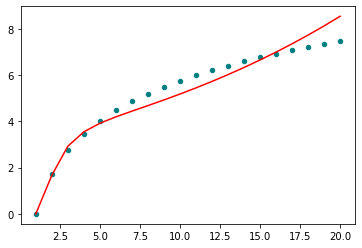

a1 = -7.446789177153012
a2 = -5.9605154725340075
a3 = -3.367442093100506
a4 = 0.0006801537968749618


In [81]:
#Plot the best fit curve against generated/experimental data
x_parameter = t
y_parameter = function(x_parameter, a1,a2,a3,a4)
plt.figure()
plt.scatter(t, Y, marker='o', color='teal', label= 'generated data', s=20)
plt.plot(x_parameter, y_parameter, '-', color="red", label = 'fitted curve')
plt.show()

In [ ]:
#Estimated parameters from fitted curve
print ('a1 = ' + str(a1))
print ('a2 = ' + str(a2))
print ('a3 = ' + str(a3))
print ('a4 = ' + str(a4))